# Linear Regression

This notebook tackles exercises 1 and 2 from Prof. Andrew Ng's machine learning course and closely follows a [tutorial](http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/) by John Wittenhauer.

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Simple Linear Regression
The task in this part is to come up with a model that predicts the profits a trucking company can earn given the size of a city's population.

In [2]:
link1 = u'https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data1.txt'
data1 = pd.read_csv(link1, header=None, names=['population', 'profit'])

In [3]:
data1.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
m, _ = data1.shape
m

97

In [5]:
data1.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


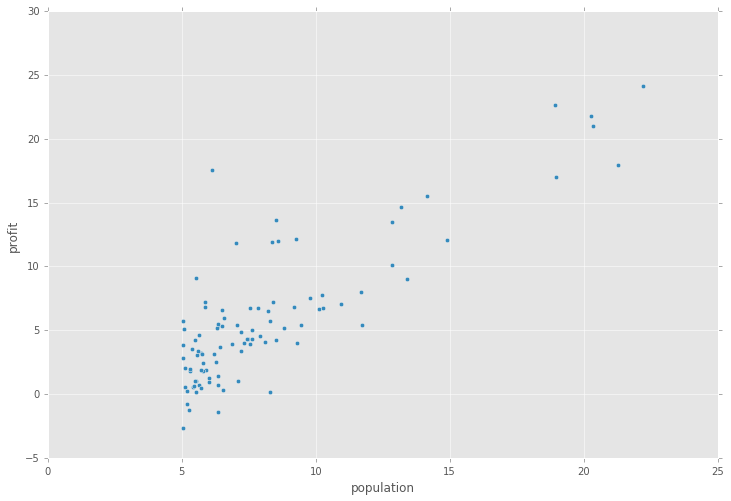

In [6]:
plt.style.use('ggplot')
data1.plot(kind='scatter', x='population', y='profit', figsize=(12, 8))

### Cost Function
This is my interpretation of the cost function defined by Prof. Ng in his lecture:

In [7]:
def cost(X, y, theta):
    error = X*theta - y
    sse = error.T * error
    return sse[0, 0] / (2 * y.shape[0])

Here, `X` is a m by n+1 matrix (n is the number of params, n=1 in this case), `y` is a m-dimensional vector containing the actual values of the target variable, `theta` is an n+1 dimensional vector containing the estimated coefficients.

Let's try this out:

### Turning Everything into Matrix Form

Before we can try this out (and especially prior to proceeding with gradient descent), we need to make sure we're working with matrices since this will make things more computationally efficient later on.

In [8]:
y = np.matrix(data1.profit.ravel()[np.newaxis].T)

In [9]:
y.shape

(97, 1)

To create our design matrix `X`, we first need to add a constant column to serve as the intercept term.

In [10]:
constant = np.ones(m)
population = data1.population.ravel()
X = np.matrix([constant, population]).T
X.shape

(97, 2)

Let's initialize our estimated coefficients with zeros:

In [11]:
ncoeffs = X.shape[1]
theta = np.matrix(np.zeros((ncoeffs, 1)))
theta.shape

(2, 1)

Now, we can try out our cost function:

In [12]:
cost(X=X, y=y, theta=theta)

32.072733877455676

### Gradient Descent

This is my implementation of the gradient descent optimization for linear regression:

In [13]:
def gradient_descent(X, y, theta, alpha=0.01, iters=1000):
    coeffs = np.matrix(theta)
    cost_v = []
    size_m = y.shape[0]
    for i in range(iters):
        coeffs = coeffs - (alpha/size_m)*(X.T * (X*coeffs - y))
        cost_v.append(cost(X=X, y=y, theta=coeffs))
    return coeffs, cost_v

### The Results
I hope this works:

In [14]:
coeffs, costs = gradient_descent(X=X, y=y, theta=theta)

In [15]:
coeffs

matrix([[-3.24140214],
        [ 1.1272942 ]])

In [16]:
costs[-1]       # value of cost function at final iteration

4.5159555030789127

### Visualizing the Results

In [17]:
xvalue = np.linspace(data1.population.min(), data1.population.max(), m)
profit = coeffs[0, 0] + coeffs[1, 0] * xvalue

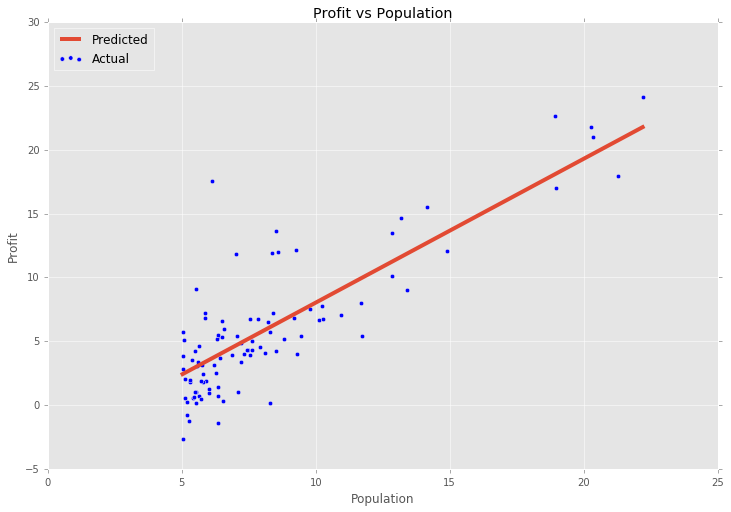

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(xvalue, profit, label='Predicted', linewidth=4)
ax.scatter(data1.population, data1.profit, label='Actual')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Profit vs Population')

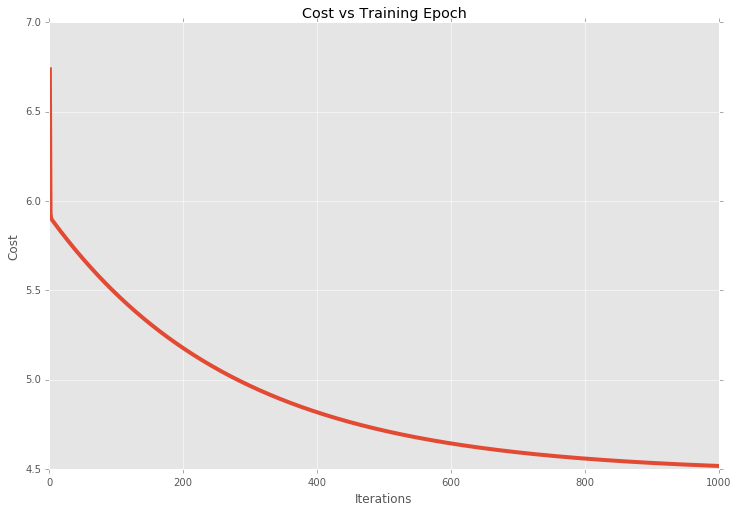

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
iters = np.arange(len(costs)) + 1
ax.plot(iters, costs, linewidth=4)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Training Epoch')

The two figures above show that we've arrived at a pretty decent linear model to describe our dataset. The regression line appears to be somewhat of an acceptable fit, and the value of the cost function drops with every additional iteration in our gradient descent implementation.

## Multiple Linear Regression
Let's extend the tools we've developed earlier to analyze linear models with more than one feature. This time, we're asked to formulate a model that can give an estimate of how much a given house will sell for based on its size and how many bedrooms it has.

In [20]:
link2 = u'https://raw.githubusercontent.com/jdwittenauer/ipython-notebooks/master/data/ex1data2.txt'
data2 = pd.read_csv(link2, header=None,
                    names=['size', 'bedrooms', 'price'])

In [21]:
data2.shape

(47, 3)

In [22]:
data2.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Feature Normalization
Looking at the numbers under our features columns, we can see that the `size` and the `bedrooms` variables are scaled very differently from each other. This can cause problems later on when we apply gradient descent. To avoid possible issues that arise from using variables with vastly different scaling, Prof. Ng suggest applying feature normalization techniques prior to running the gradient descent thing so that our features are expressed in roughly similar scales. One way to do this is as follows:

In [23]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Now, our dataset is scaled identically. The transformation we applied essentially turned each entry in the dataset into the number of standard deviations the original entry was from its mean. We can proceed.

### Converting Everything into Matrices

In [24]:
# the target variable
z = np.matrix(data2.price.ravel()[np.newaxis].T)
z.shape

(47, 1)

In [25]:
# the design matrix B
df = pd.DataFrame(data2[['size', 'bedrooms']])
df.insert(0, 'const', 1)
B = np.matrix(df)
B.shape

(47, 3)

In [26]:
B[:5, :]

matrix([[ 1.        ,  0.13000987, -0.22367519],
        [ 1.        , -0.50418984, -0.22367519],
        [ 1.        ,  0.50247636, -0.22367519],
        [ 1.        , -0.73572306, -1.53776691],
        [ 1.        ,  1.25747602,  1.09041654]])

In [27]:
# the parameter vector
nsamples, ncoeffs = B.shape
theta = np.matrix(np.zeros(shape=(ncoeffs, 1)))
theta.shape

(3, 1)

### Applying Gradient Descent

In [28]:
coeffs, costs = gradient_descent(X=B, y=z, theta=theta)

In [29]:
coeffs

matrix([[ -1.02896415e-16],
        [  8.78503652e-01],
        [ -4.69166570e-02]])

### Visualizations

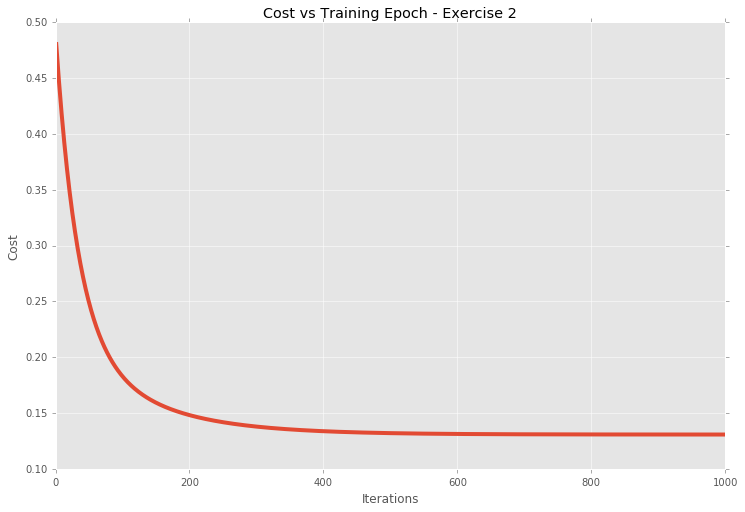

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
iters = np.arange(len(costs)) + 1
ax.plot(iters, costs, linewidth=4)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Training Epoch - Exercise 2')

## An Easier Way
Of course, there's already an entire Python library devoted to the things that need to be done in machine learning. Here's one such module, applied to the simple linear regression problem from above.

In [31]:
from sklearn import linear_model

In [32]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

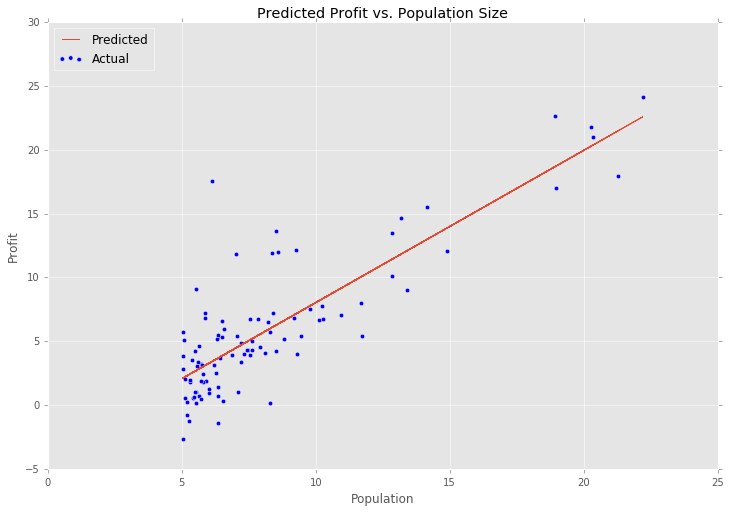

In [33]:
# plotting it
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, label='Predicted')
ax.scatter(data1.population, data1.profit, label='Actual')
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

Good.